<a href="https://colab.research.google.com/github/rherna09/Superhero_creator_predictor/blob/main/Superhero_Creator_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as p
heroes = p.read_csv('/content/gdrive/MyDrive/superheroes_nlp_dataset.csv')

In [3]:
print(heroes)

               name               real_name               full_name  \
0           3-D Man     Delroy Garrett, Jr.     Delroy Garrett, Jr.   
1     514A (Gotham)             Bruce Wayne                     NaN   
2            A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
3                Aa                      Aa                     NaN   
4        Aaron Cash              Aaron Cash              Aaron Cash   
...             ...                     ...                     ...   
1445        Zatanna          Zatanna Zatara          Zatanna Zatara   
1446           Zero             DWN-∞: Zero             DWN-∞: Zero   
1447  Zoom (New 52)          Hunter Zolomon                     NaN   
1448           Zoom          Hunter Zolomon          Hunter Zolomon   
1449          Zzzax                     NaN                     NaN   

     overall_score                                       history_text  \
0                6  Delroy Garrett, Jr. grew up to become a track ...   
1

In [4]:
print("The shape of the data frame:", heroes.shape)

The shape of the data frame: (1450, 81)


STEP 1: Exploring Data

In [5]:
#checking for Nan in history text
print("Number of missing values in history column:", heroes['history_text'].isnull().values.sum())
#checking for Nan in powers text
print("Number of missing values in power column:", heroes['powers_text'].isnull().values.sum())
#checking for Nan in creators column
print("Number of missing values in creator column:", heroes['creator'].isnull().values.sum())

Number of missing values in history column: 90
Number of missing values in power column: 364
Number of missing values in creator column: 139


Step 2: Create New Data Frame with desired columns

In [6]:
train_heroes = heroes[['name', 'history_text', 'powers_text', 'creator']].copy()
train_heroes.head()

,name,history_text,powers_text,creator
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",NaN,Marvel Comics
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,NaN,DC Comics
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics
3,Aa,Aa is one of the more passive members of the P...,NaN,DC Comics
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,NaN,DC Comics


Step 3: Fill NaN with value name 'unknown' in the creator column.

In [7]:
#Finding location where NaN exists in creator column
train_heroes['creator'].fillna("unknown", inplace = True)
train_heroes

,name,history_text,powers_text,creator
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",NaN,Marvel Comics
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,NaN,DC Comics
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics
3,Aa,Aa is one of the more passive members of the P...,NaN,DC Comics
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,NaN,DC Comics
...,...,...,...,...
1445,Zatanna,Zatanna is the daughter of adventurer John Zat...,Zatanna is genetically talented with her magi...,DC Comics
1446,Zero,Zero was created by the late Dr. Albert Wily ...,NaN,Capcom
1447,Zoom (New 52),"Hunter Zolomon is better known as Zoom, a spee...",After tricking Barry Allen and Wally West into...,DC Comics
1448,Zoom,Hunter Zolomon had a troubled relationship wi...,"Zoom is able to alter time, to make himself ev...",DC Comics


In [8]:
print((train_heroes.loc[train_heroes['creator']=='unknown']))

                    name                                       history_text  \
16              Acidicus  During the Serpentine Wars, Acidicus and the o...   
34     Alex Danvers (CW)                                                NaN   
39                 Alita  Alita, known in Japan as Gally and originally ...   
46       A.M.A.Z.O. (CW)  The Anti Meta-human Adaptive Zootomic Organism...   
50    Anacondrai Serpent  The Anacondrai Serpent would help the Serpenti...   
...                  ...                                                ...   
1405         Will Solace  Will Solace becomes the head counselor of the ...   
1426                  Wu  Wu was born to the First Spinjitzu Master, alo...   
1431             XS (CW)  According to Eobard Thawne, the daughter of Ba...   
1432                Yang                                                NaN   
1444                Zane  Zane was created by Dr. Julien in a small work...   

                                            powers_

Step 4: Create and clean a new dataframe with all of the unknown creators.  Will use this dataframe to predict who the unknown creators are. 

In [9]:
unknown_creator = train_heroes.loc[train_heroes['creator']=='unknown']
print(unknown_creator)

                    name                                       history_text  \
16              Acidicus  During the Serpentine Wars, Acidicus and the o...   
34     Alex Danvers (CW)                                                NaN   
39                 Alita  Alita, known in Japan as Gally and originally ...   
46       A.M.A.Z.O. (CW)  The Anti Meta-human Adaptive Zootomic Organism...   
50    Anacondrai Serpent  The Anacondrai Serpent would help the Serpenti...   
...                  ...                                                ...   
1405         Will Solace  Will Solace becomes the head counselor of the ...   
1426                  Wu  Wu was born to the First Spinjitzu Master, alo...   
1431             XS (CW)  According to Eobard Thawne, the daughter of Ba...   
1432                Yang                                                NaN   
1444                Zane  Zane was created by Dr. Julien in a small work...   

                                            powers_

In [10]:
#Creating a new dataframe and replace NaN with empty strings
unknown_creator2 = unknown_creator.fillna("")
print(unknown_creator2)

                    name                                       history_text  \
16              Acidicus  During the Serpentine Wars, Acidicus and the o...   
34     Alex Danvers (CW)                                                      
39                 Alita  Alita, known in Japan as Gally and originally ...   
46       A.M.A.Z.O. (CW)  The Anti Meta-human Adaptive Zootomic Organism...   
50    Anacondrai Serpent  The Anacondrai Serpent would help the Serpenti...   
...                  ...                                                ...   
1405         Will Solace  Will Solace becomes the head counselor of the ...   
1426                  Wu  Wu was born to the First Spinjitzu Master, alo...   
1431             XS (CW)  According to Eobard Thawne, the daughter of Ba...   
1432                Yang                                                      
1444                Zane  Zane was created by Dr. Julien in a small work...   

                                            powers_

In [11]:
#Merging text columsn together
unknown_creator2["text"] = unknown_creator2["history_text"] + unknown_creator2["powers_text"]
#print(unknown_creator2)


In [12]:
unknown = unknown_creator2[['name', 'text', 'creator']].copy()
unknown.head(10)

,name,text,creator
16,Acidicus,"During the Serpentine Wars, Acidicus and the o...",unknown
34,Alex Danvers (CW),"As a top agent of the D.E.O., Alex is in top p...",unknown
39,Alita,"Alita, known in Japan as Gally and originally ...",unknown
46,A.M.A.Z.O. (CW),The Anti Meta-human Adaptive Zootomic Organism...,unknown
50,Anacondrai Serpent,The Anacondrai Serpent would help the Serpenti...,unknown
61,Annabeth Chase (FOX),Annabeth was seven when she ran away from home...,unknown
81,Arcturus,Arcturus was General of the Anacondrai during ...,unknown
85,Arkade,When Daddy No Legs lead the Ninja into the Pit...,unknown
93,Artemis (CW),"Evelyn Crawford ""Evie"" Sharp (born c.1999) is ...",unknown
96,Aspheera,Aspheera is the leader of the Pyro Vipers and ...,unknown


In [13]:
#Removing whitespaces from unkown dataframe using strip
unknown['text'].str.strip()
print(unknown)

                    name                                               text  \
16              Acidicus  During the Serpentine Wars, Acidicus and the o...   
34     Alex Danvers (CW)  As a top agent of the D.E.O., Alex is in top p...   
39                 Alita  Alita, known in Japan as Gally and originally ...   
46       A.M.A.Z.O. (CW)  The Anti Meta-human Adaptive Zootomic Organism...   
50    Anacondrai Serpent  The Anacondrai Serpent would help the Serpenti...   
...                  ...                                                ...   
1405         Will Solace  Will Solace becomes the head counselor of the ...   
1426                  Wu  Wu was born to the First Spinjitzu Master, alo...   
1431             XS (CW)  According to Eobard Thawne, the daughter of Ba...   
1432                Yang  Yang's fighting style is much more aggressive ...   
1444                Zane  Zane was created by Dr. Julien in a small work...   

      creator  
16    unknown  
34    unknown  
39 

In [14]:
unknown['text'] = unknown['text'].str.replace(r'[^\w\s]+', '')
unknown.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,name,text,creator
16,Acidicus,During the Serpentine Wars Acidicus and the ot...,unknown
34,Alex Danvers (CW),As a top agent of the DEO Alex is in top physi...,unknown
39,Alita,Alita known in Japan as Gally and originally n...,unknown
46,A.M.A.Z.O. (CW),The Anti Metahuman Adaptive Zootomic Organism ...,unknown
50,Anacondrai Serpent,The Anacondrai Serpent would help the Serpenti...,unknown


Step 5: Cleaning Training dataset by replacing NaN with empty strings, merging text columns, removing white space in text column and dropping all unknowns since we have an unknown dataframe that we will use to predict. 

In [15]:
#Replacing NaN's
train_heroes = train_heroes.fillna("")
print(train_heroes)

               name                                       history_text  \
0           3-D Man  Delroy Garrett, Jr. grew up to become a track ...   
1     514A (Gotham)  He was one of the many prisoners of Indian Hil...   
2            A-Bomb   Richard "Rick" Jones was orphaned at a young ...   
3                Aa  Aa is one of the more passive members of the P...   
4        Aaron Cash  Aaron Cash is the head of security at Arkham A...   
...             ...                                                ...   
1445        Zatanna  Zatanna is the daughter of adventurer John Zat...   
1446           Zero   Zero was created by the late Dr. Albert Wily ...   
1447  Zoom (New 52)  Hunter Zolomon is better known as Zoom, a spee...   
1448           Zoom   Hunter Zolomon had a troubled relationship wi...   
1449          Zzzax  Zzzax was the product of an accident that occu...   

                                            powers_text        creator  
0                                     

In [16]:
#Merging Text Columns
train_heroes["text"] = train_heroes["history_text"] + train_heroes["powers_text"]
print(train_heroes)

               name                                       history_text  \
0           3-D Man  Delroy Garrett, Jr. grew up to become a track ...   
1     514A (Gotham)  He was one of the many prisoners of Indian Hil...   
2            A-Bomb   Richard "Rick" Jones was orphaned at a young ...   
3                Aa  Aa is one of the more passive members of the P...   
4        Aaron Cash  Aaron Cash is the head of security at Arkham A...   
...             ...                                                ...   
1445        Zatanna  Zatanna is the daughter of adventurer John Zat...   
1446           Zero   Zero was created by the late Dr. Albert Wily ...   
1447  Zoom (New 52)  Hunter Zolomon is better known as Zoom, a spee...   
1448           Zoom   Hunter Zolomon had a troubled relationship wi...   
1449          Zzzax  Zzzax was the product of an accident that occu...   

                                            powers_text        creator  \
0                                    

In [17]:
train1 = train_heroes[['name', 'text', 'creator']].copy()
train1.head()

,name,text,creator
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",Marvel Comics
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,DC Comics
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",Marvel Comics
3,Aa,Aa is one of the more passive members of the P...,DC Comics
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,DC Comics


In [18]:
train1['text'] = train1['text'].str.replace(r'[^\w\s]+', '')
train1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,name,text,creator
0,3-D Man,Delroy Garrett Jr grew up to become a track st...,Marvel Comics
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,DC Comics
2,A-Bomb,Richard Rick Jones was orphaned at a young ag...,Marvel Comics
3,Aa,Aa is one of the more passive members of the P...,DC Comics
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,DC Comics


In [19]:
#dropping values 'unknown'
train1 = train1[train1.creator != 'unknown']

exists = "unknown" in train1
print(exists)

False


In [20]:
#removing white spaces from train1 dataframe
train1['text'].str.strip()
print(train1)

               name                                               text  \
0           3-D Man  Delroy Garrett Jr grew up to become a track st...   
1     514A (Gotham)  He was one of the many prisoners of Indian Hil...   
2            A-Bomb   Richard Rick Jones was orphaned at a young ag...   
3                Aa  Aa is one of the more passive members of the P...   
4        Aaron Cash  Aaron Cash is the head of security at Arkham A...   
...             ...                                                ...   
1445        Zatanna  Zatanna is the daughter of adventurer John Zat...   
1446           Zero   Zero was created by the late Dr Albert Wily s...   
1447  Zoom (New 52)  Hunter Zolomon is better known as Zoom a speed...   
1448           Zoom   Hunter Zolomon had a troubled relationship wi...   
1449          Zzzax  Zzzax was the product of an accident that occu...   

            creator  
0     Marvel Comics  
1         DC Comics  
2     Marvel Comics  
3         DC Comics  
4

Step 6: Visualize train text and creators

In [21]:
#view the total number of creators in creator column using value_counts
train1["creator"].value_counts()

Marvel Comics             615
DC Comics                 444
Shueisha                   37
Dark Horse Comics          29
Lego                       22
George Lucas               18
Image Comics               17
NBC - Heroes               16
Ubisoft                     9
J. R. R. Tolkien            8
J. K. Rowling               8
Wildstorm                   7
George R. R. Martin         7
Team Epic TV                6
HarperCollins               6
SyFy                        6
Capcom                      5
Icon Comics                 4
Mortal Kombat               4
ABC Studios                 4
Nintendo                    4
Star Trek                   4
Sony Pictures               3
Hasbro                      3
Disney                      3
Namco                       3
Cartoon Network             2
Universal Studios           2
IDW Publishing              2
Clive Barker                2
Mattel                      1
Sega                        1
Microsoft                   1
Hanna-Barb

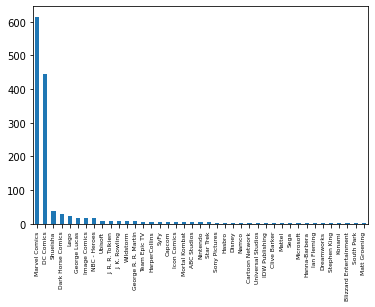

In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


train1['creator'].value_counts().plot(kind='bar')
plt.xticks(fontsize=6)
plt.show()


In [23]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
words = "".join(review for review in train1.text.astype(str))

In [24]:
print("There are {} words in the combination of all cells in column text.".format(len(words)))

There are 6495461 words in the combination of all cells in column text.


In [25]:
stopwords = set(STOPWORDS)

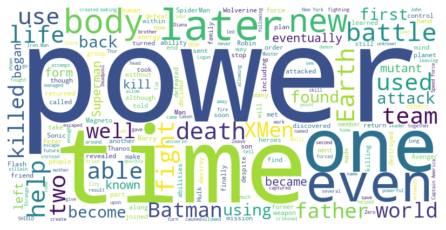

In [26]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(words)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Step 6: Create Vectorizers

In [27]:
#Building Lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

class LemmaTokenizer(object):
  def __init__(self):
    self.wnl=WordNetLemmatizer()
  def __call__(self, text):
    return[self.wnl.lemmatize(t) for t in word_tokenize(text)]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
#norm set to 'l2' to make sure all feature vectors have a euclidian norm of 1
#unigram boolean vectorizer
bool_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin-1', binary=True, min_df=2,  stop_words='english')

#unigram term frequency
unigram_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin-1', min_df=2, stop_words='english')

#unigram and bigram
bigram_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin-1', ngram_range=(1,2), min_df=2, stop_words='english')

#unigram tfidf
unigram_tfidf_vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(), encoding='latin-1', use_idf=True, min_df=2, stop_words='english')

Step 7: Create training and testing data

In [30]:
y = train1['creator'].values
X = train1['text'].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=True)

Step 8: Data Checking

In [31]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])


(786,) (786,) (525,) (525,)
 Pietro Maximoff was the son of the mutant called Magneto and the gypsy named Magda Just prior to Pietros birth Magda fled from Magneto terrified of the bizarre powers he suddenly manifested and his intentions of world domination Seeking refuge in the scientific citadel of Wundagore in the Balkan Mountains of the tiny European nation of Transia Magda was taken in by Bova a humanoid cow evolved by the genetic engineer called the High Evolutionary Magda gave birth to twins a boy and a girl with Bova as her midwife and named them Wanda and Pietro Still afraid that her husband might find her and learn of the children Magda left Bova a note explaining her fears and walked into the frozen mountain wilderness to perish Feeling that it was not right to raise two seemingly normal babies amid the evolved animalmen of Wundagore Bova was relieved when several nights later an American couple Robert and Madeline Frank also came to Wundagore seeking assistance The Franks w

In [32]:
training_labels = set(y_train)
print(training_labels)
from scipy.stats import itemfreq
training_category_dist = itemfreq(y_train)
print(training_category_dist)

{'Ubisoft', 'Sony Pictures', 'Disney', 'Icon Comics', 'Hanna-Barbera', 'Shueisha', 'Star Trek', 'South Park', 'Lego', 'Marvel Comics', 'Microsoft', 'Team Epic TV', 'NBC - Heroes', 'Dark Horse Comics', 'ABC Studios', 'Nintendo', 'J. R. R. Tolkien', 'Matt Groening', 'Image Comics', 'Mortal Kombat', 'Dreamworks', 'J. K. Rowling', 'Stephen King', 'DC Comics', 'George R. R. Martin', 'Hasbro', 'HarperCollins', 'Sega', 'Cartoon Network', 'Capcom', 'SyFy', 'Blizzard Entertainment', 'Universal Studios', 'Wildstorm', 'George Lucas'}
[['ABC Studios' 3]
 ['Blizzard Entertainment' 1]
 ['Capcom' 4]
 ['Cartoon Network' 1]
 ['DC Comics' 268]
 ['Dark Horse Comics' 12]
 ['Disney' 3]
 ['Dreamworks' 1]
 ['George Lucas' 10]
 ['George R. R. Martin' 6]
 ['Hanna-Barbera' 1]
 ['HarperCollins' 2]
 ['Hasbro' 2]
 ['Icon Comics' 3]
 ['Image Comics' 8]
 ['J. K. Rowling' 5]
 ['J. R. R. Tolkien' 5]
 ['Lego' 15]
 ['Marvel Comics' 373]
 ['Matt Groening' 1]
 ['Microsoft' 1]
 ['Mortal Kombat' 1]
 ['NBC - Heroes' 9]
 ['Ni

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:     `itemfreq` is deprecated!
    `itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


There is a skew towards Marvel and DC comics but we know that from the barchart above.  

Step 9: Vectorize the training data using term frequency. 

In [33]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
X_train_vec = unigram_vectorizer.fit_transform(X_train)

#check contents of the document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())
#print out the first 10 items in the vocabulary
print(list(unigram_vectorizer.vocabulary_))
#check the size of the constructed vocabulary
print(len(unigram_vectorizer.vocabulary_))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


(786, 13115)
[[0 1 0 ... 0 0 0]]
['pietro', 'maximoff', 'wa', 'son', 'mutant', 'called', 'magneto', 'gypsy', 'named', 'magda', 'just', 'prior', 'birth', 'fled', 'terrified', 'bizarre', 'power', 'suddenly', 'manifested', 'intention', 'world', 'domination', 'seeking', 'refuge', 'scientific', 'citadel', 'wundagore', 'balkan', 'mountain', 'tiny', 'european', 'nation', 'taken', 'humanoid', 'cow', 'evolved', 'genetic', 'engineer', 'high', 'evolutionary', 'gave', 'twin', 'boy', 'girl', 'midwife', 'wanda', 'afraid', 'husband', 'learn', 'child', 'left', 'note', 'explaining', 'fear', 'walked', 'frozen', 'wilderness', 'perish', 'feeling', 'right', 'raise', 'seemingly', 'normal', 'baby', 'amid', 'animalmen', 'relieved', 'night', 'later', 'american', 'couple', 'robert', 'madeline', 'frank', 'came', 'assistance', 'super', 'hero', 'active', 'war', 'ii', 'known', 'miss', 'america', 'pregnant', 'intended', 'newborn', 'unfortunately', 'stillborn', 'died', 'complication', 'giving', 'presented', 'claiming

Step 10: Vectorize testing data

In [34]:
X_test_vec = unigram_vectorizer.transform(X_test)

print(X_test_vec.shape)

(525, 13115)


Step 11: Train Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier()

tree1 = tree1.fit(X_train_vec,y_train)

treepred = tree1.predict(X_test_vec)

In [36]:
#model accuracy
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, treepred))

Accuracy:  0.660952380952381


Step 12: Visualize Decision Trees

[Text(0.9583891559618567, 0.9936708860759493, 'X[7680] <= 0.5\ngini = 0.656\nsamples = 786\nvalue = [3, 1, 4, 1, 268, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 15, 373, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.9369532666088738, 0.9810126582278481, 'X[1206] <= 0.5\ngini = 0.689\nsamples = 666\nvalue = [3, 1, 3, 1, 267, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 15, 255, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.9142564425880684, 0.9683544303797469, 'X[1051] <= 0.5\ngini = 0.703\nsamples = 596\nvalue = [3, 1, 3, 1, 198, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 14, 255, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.8890377492316179, 0.9556962025316456, 'X[10939] <= 0.5\ngini = 0.725\nsamples = 536\nvalue = [3, 1, 3, 1, 197, 12, 3, 1, 10, 6, 0, 2, 2, 3\n8, 5, 5, 14, 197, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.8722252869939843, 0.9430379746835443, 'X[6387] <= 0.5\ngini = 0.734\nsamples = 503\nvalue = [3, 1, 3, 1, 197, 12, 3, 1, 10,

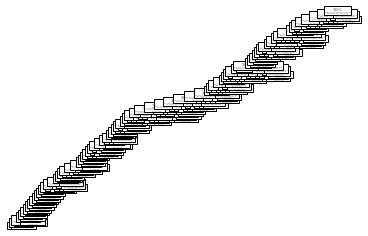

In [37]:
from matplotlib import pyplot as plt
from sklearn import tree
tree.plot_tree(tree1)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, treepred))

                     precision    recall  f1-score   support

        ABC Studios       0.00      0.00      0.00         1
             Capcom       0.00      0.00      0.00         1
    Cartoon Network       0.00      0.00      0.00         1
       Clive Barker       0.00      0.00      0.00         2
          DC Comics       0.72      0.65      0.68       176
  Dark Horse Comics       0.08      0.06      0.07        17
       George Lucas       0.25      0.12      0.17         8
George R. R. Martin       0.00      0.00      0.00         1
      HarperCollins       0.00      0.00      0.00         4
             Hasbro       0.00      0.00      0.00         1
     IDW Publishing       0.00      0.00      0.00         2
        Ian Fleming       0.00      0.00      0.00         1
        Icon Comics       0.00      0.00      0.00         1
       Image Comics       0.80      0.44      0.57         9
      J. K. Rowling       1.00      0.67      0.80         3
   J. R. R. Tolkien    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#pruning tree
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth = 2)

tree2 = tree2.fit(X_train_vec, y_train)

tree2pred = tree2.predict(X_test_vec)

print("Accuracy:", metrics.accuracy_score(y_test, tree2pred))

Accuracy: 0.5504761904761905


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, tree2pred))
print(confusion_matrix(y_test, tree2pred))

                     precision    recall  f1-score   support

        ABC Studios       0.00      0.00      0.00         1
             Capcom       0.00      0.00      0.00         1
    Cartoon Network       0.00      0.00      0.00         1
       Clive Barker       0.00      0.00      0.00         2
          DC Comics       0.96      0.27      0.42       176
  Dark Horse Comics       0.00      0.00      0.00        17
       George Lucas       0.00      0.00      0.00         8
George R. R. Martin       0.00      0.00      0.00         1
      HarperCollins       0.00      0.00      0.00         4
             Hasbro       0.00      0.00      0.00         1
     IDW Publishing       0.00      0.00      0.00         2
        Ian Fleming       0.00      0.00      0.00         1
        Icon Comics       0.00      0.00      0.00         1
       Image Comics       0.00      0.00      0.00         9
      J. K. Rowling       0.00      0.00      0.00         3
   J. R. R. Tolkien    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.8333333333333334, 'X[7680] <= 0.5\nentropy = 2.3\nsamples = 786\nvalue = [3, 1, 4, 1, 268, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 15, 373, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.25, 0.5, 'X[1206] <= 0.5\nentropy = 2.486\nsamples = 666\nvalue = [3, 1, 3, 1, 267, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 15, 255, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.125, 0.16666666666666666, 'entropy = 2.601\nsamples = 596\nvalue = [3, 1, 3, 1, 198, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 14, 255, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.108\nsamples = 70\nvalue = [0, 0, 0, 0, 69, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(0.75, 0.5, 'X[1179] <= 1.0\nentropy = 0.139\nsamples = 120\nvalue = [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 118, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(0.625, 0.16666666666666666, 'entropy = 

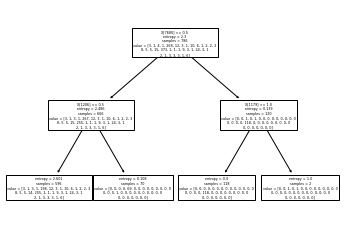

In [41]:
tree.plot_tree(tree2)

Step 13: Create decision tree with bigram vectorizer

In [42]:
#vectorize training data
X_train_bivec = bigram_vectorizer.fit_transform(X_train)

print(X_train_bivec.shape)
print(X_train_bivec[0].toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


(786, 39185)
[[0 0 1 ... 0 0 0]]


In [43]:
#vectorize testing data
X_Test_bivec = bigram_vectorizer.transform(X_test)
print(X_Test_bivec.shape)

(525, 39185)


In [44]:
bitree1 = DecisionTreeClassifier()

bitree1 = bitree1.fit(X_train_bivec,y_train)

bitreepred = bitree1.predict(X_Test_bivec)

print("Accuracy:", metrics.accuracy_score(y_test, bitreepred))

Accuracy: 0.6704761904761904


[Text(0.9571729843724652, 0.9933333333333333, 'X[22866] <= 0.5\ngini = 0.656\nsamples = 786\nvalue = [3, 1, 4, 1, 268, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 15, 373, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.9351105823825231, 0.98, 'X[3519] <= 0.5\ngini = 0.689\nsamples = 666\nvalue = [3, 1, 3, 1, 267, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 15, 255, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.9117503920402314, 0.9666666666666667, 'X[3050] <= 0.5\ngini = 0.703\nsamples = 596\nvalue = [3, 1, 3, 1, 198, 12, 3, 1, 10, 6, 1, 2, 2, 3\n8, 5, 5, 14, 255, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.8857946249932407, 0.9533333333333334, 'X[31669] <= 0.5\ngini = 0.725\nsamples = 536\nvalue = [3, 1, 3, 1, 197, 12, 3, 1, 10, 6, 0, 2, 2, 3\n8, 5, 5, 14, 197, 1, 1, 1, 9, 3, 1, 24, 3, 1\n2, 1, 3, 3, 3, 1, 6]'),
 Text(0.8684907802952468, 0.94, 'X[18485] <= 0.5\ngini = 0.734\nsamples = 503\nvalue = [3, 1, 3, 1, 197, 12, 3, 1, 10, 6, 0, 2, 2, 3\n8, 5, 5, 1

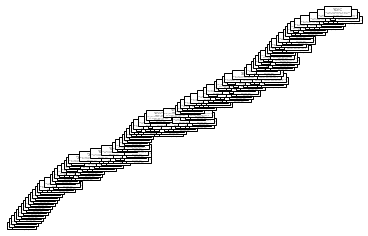

In [45]:
tree.plot_tree(bitree1)

In [46]:
from sklearn.tree import export_text
import numpy as np
labels = np.unique(y_test)
biconfusion_matrix = metrics.confusion_matrix(y_test, bitreepred, labels =labels)
bimatrix_df = pd.DataFrame(biconfusion_matrix, index = labels, columns = labels)
bimatrix_df.head(5)

,ABC Studios,Capcom,Cartoon Network,Clive Barker,DC Comics,Dark Horse Comics,George Lucas,George R. R. Martin,HarperCollins,Hasbro,...,NBC - Heroes,Namco,Nintendo,Shueisha,Star Trek,SyFy,Team Epic TV,Ubisoft,Universal Studios,Wildstorm
ABC Studios,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Capcom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cartoon Network,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Clive Barker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DC Comics,0,0,0,0,138,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [47]:
print(classification_report(y_test, bitreepred))

                     precision    recall  f1-score   support

        ABC Studios       0.00      0.00      0.00         1
             Capcom       0.00      0.00      0.00         1
    Cartoon Network       0.00      0.00      0.00         1
       Clive Barker       0.00      0.00      0.00         2
          DC Comics       0.65      0.78      0.71       176
  Dark Horse Comics       0.23      0.18      0.20        17
       George Lucas       0.25      0.12      0.17         8
George R. R. Martin       0.17      1.00      0.29         1
      HarperCollins       0.00      0.00      0.00         4
             Hasbro       0.00      0.00      0.00         1
     IDW Publishing       0.00      0.00      0.00         2
        Ian Fleming       0.00      0.00      0.00         1
        Icon Comics       0.00      0.00      0.00         1
       Image Comics       1.00      0.44      0.62         9
      J. K. Rowling       1.00      0.67      0.80         3
   J. R. R. Tolkien    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Step 14: Create Naive Bayes Model

In [48]:
#Vectorize training and testing data using CountVectorizer
X_train_v = unigram_vectorizer.fit_transform(X_train)
print(X_train_v)
print(X_train_v[0].toarray())

  (0, 8584)	24
  (0, 7225)	3
  (0, 12660)	42
  (0, 10829)	3
  (0, 7680)	12
  (0, 1774)	2
  (0, 7029)	19
  (0, 5203)	3
  (0, 7719)	3
  (0, 7010)	5
  (0, 6386)	1
  (0, 8889)	1
  (0, 1384)	5
  (0, 4592)	4
  (0, 11717)	1
  (0, 1397)	1
  (0, 8773)	16
  (0, 11306)	1
  (0, 7106)	1
  (0, 6095)	1
  (0, 12942)	5
  (0, 3537)	1
  (0, 10310)	2
  (0, 9486)	3
  (0, 10229)	1
  :	:
  (785, 1052)	1
  (785, 12429)	1
  (785, 8149)	1
  (785, 4488)	1
  (785, 10638)	8
  (785, 981)	1
  (785, 980)	6
  (785, 9364)	1
  (785, 9516)	1
  (785, 2766)	2
  (785, 330)	1
  (785, 4569)	1
  (785, 12015)	1
  (785, 7715)	1
  (785, 5239)	3
  (785, 1826)	1
  (785, 5567)	1
  (785, 11375)	1
  (785, 7245)	1
  (785, 10516)	1
  (785, 3684)	1
  (785, 6535)	10
  (785, 3159)	1
  (785, 11022)	1
  (785, 2605)	1
[[0 1 0 ... 0 0 0]]


In [49]:
print(len(unigram_vectorizer.vocabulary_))
print(list(unigram_vectorizer.vocabulary_.items())[:10])

13115
[('pietro', 8584), ('maximoff', 7225), ('wa', 12660), ('son', 10829), ('mutant', 7680), ('called', 1774), ('magneto', 7029), ('gypsy', 5203), ('named', 7719), ('magda', 7010)]


In [50]:
#vectorize test data
X_test_v = unigram_vectorizer.transform(X_test)
print(X_test_v.shape)

(525, 13115)


In [51]:
from sklearn.naive_bayes import MultinomialNB
nb_clf=MultinomialNB()

In [52]:
nb_clf.fit(X_train_v, y_train)

MultinomialNB()

In [53]:
#Test the MNB classifier
nb_clf.score(X_test_v,y_test)

0.8057142857142857

In [54]:
#Making Prediction
nb_pred = nb_clf.fit(X_train_v, y_train).predict(X_test_v)

In [55]:
#Creating confusion matrix
nbcm = confusion_matrix(y_test, nb_pred)
print(nbcm)

[[  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 167   0   0   0   0   0   0   0   0   0   0   0   0   0
    9   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   8   2   0   0   0   0   0   0   0   0   0   0   0   0
    6   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   6   0   0   0   0   0   0   0   0   0   0   0
    2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  

In [56]:
#print classification report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, nb_pred, average=None))
print(recall_score(y_test, nb_pred, average=None))

print(classification_report(y_test, nb_pred))

[0.         0.         0.         0.         0.76958525 1.
 1.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         1.
 0.82105263 0.         0.         0.         0.         0.
 0.91666667 0.         0.         0.         0.         0.
 0.        ]
[0.         0.         0.         0.         0.94886364 0.11764706
 0.75       0.         0.         0.         0.         0.
 0.         0.         0.66666667 0.         0.         0.14285714
 0.96694215 0.         0.         0.         0.         0.
 0.84615385 0.         0.         0.         0.         0.
 0.        ]
                     precision    recall  f1-score   support

        ABC Studios       0.00      0.00      0.00         1
             Capcom       0.00      0.00      0.00         1
    Cartoon Network       0.00      0.00      0.00         1
       Clive Barker       0.00      0.00      0.00         2
          DC Comics       0.77      0.95      0.85       176
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

Part II:  Every model created keeps returing 0.00 in recall, precision and F1-Score for a great number of superhero creators.  New models are created using the values that are generating results and are not defaulting to 0.0.  A new training data frame will be created and the process will be replicated using a smaller sample of data.  

Part II Step 1: Create a new train dataframe by using groupby and get_group to extract the creator values with recall, precission and f1-scores.  

In [57]:
DC = train1.groupby(train1.creator)
DC = DC.get_group("DC Comics")
DC

,name,text,creator
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,DC Comics
3,Aa,Aa is one of the more passive members of the P...,DC Comics
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,DC Comics
7,Abin Sur,Originally a history professor on the planet ...,DC Comics
9,Abra Kadabra (CW),Abra Kadabra was a criminal time traveler from...,DC Comics
...,...,...,...
1421,Wonder Woman,Origin Wonder Woman did not keep her identity...,DC Comics
1425,Wotan,One of the main enemies of Doctor Fate,DC Comics
1445,Zatanna,Zatanna is the daughter of adventurer John Zat...,DC Comics
1447,Zoom (New 52),Hunter Zolomon is better known as Zoom a speed...,DC Comics


In [58]:
Marvel = train1.groupby(train1.creator)
Marvel = Marvel.get_group("Marvel Comics")
Marvel

,name,text,creator
0,3-D Man,Delroy Garrett Jr grew up to become a track st...,Marvel Comics
2,A-Bomb,Richard Rick Jones was orphaned at a young ag...,Marvel Comics
8,Abomination,Formerly known as Emil Blonsky a spy of Soviet...,Marvel Comics
11,Abraxas,Born within the abstract entity Eternity Abrax...,Marvel Comics
12,Absorbing Man (MCU),Carl Crusher Creel was an enhanced individual ...,Marvel Comics
...,...,...,...
1440,Yondu (MCU),Yondu Udonta was a Centaurian leader of a key ...,Marvel Comics
1441,Yondu,Yondu is the leader of the Ravagers a group of...,Marvel Comics
1442,Yukio (FOX),When she was 5 years old Yukio predicted her ...,Marvel Comics
1443,Yukio,Little is known about the early life of the ad...,Marvel Comics


In [59]:
Dark_Horse = train1.groupby(train1.creator)
Dark_Horse = Dark_Horse.get_group("Dark Horse Comics")
Dark_Horse

,name,text,creator
6,Abe Sapien,Sapien began life as Langdon Everett Caul a V...,Dark Horse Comics
38,Alien,There are several different phases to a Xeno...,Dark Horse Comics
43,Alucard,Alucard アーカード Ākādo is the main protagonist of...,Dark Horse Comics
55,Angel Of Death,For ages the Angel of Death resided in the rui...,Dark Horse Comics
58,Angel,Much of Angels past life is revealed through ...,Dark Horse Comics
118,Barb Wire,Barbara Barb Wire Kopetskis father is a former...,Dark Horse Comics
232,Buffy,At the age of fifteen Buffy Summers started ...,Dark Horse Comics
365,Dash,Dashiell often gets into trouble and loves pl...,Dark Horse Comics
435,Elastigirl,Helen Parr known by the superhero name Elasti...,Dark Horse Comics
589,Hellboy (Injustice 2),Biography As a member of the Bureau for Parano...,Dark Horse Comics


In [60]:
Lucas = train1.groupby(train1.creator)
Lucas = Lucas.get_group("George Lucas")
Lucas

,name,text,creator
5,Aayla Secura,ayla Secura was a Rutian Twilek Jedi Knight an...,George Lucas
361,Darth Maul,Darth Maul later known simply as Maul was a m...,George Lucas
362,Darth Nihilus,Darth Nihilus pronounced ˈnaɪəlɨs was a Human ...,George Lucas
363,Darth Nox,Darth Nox real name Remowa Alucard and also kn...,George Lucas
532,Grand Master Skywalker,After the defeat of the Empire Luke Skywalker ...,George Lucas
539,Greedo,Greedo was a male Rodian bounty hunter who gr...,George Lucas
603,HK-47,A selfsentient killing machine HK47 was far mo...,George Lucas
635,Indiana Jones,Dr Henry Walton Jones Junior was an American ...,George Lucas
648,Iron Man (Model 45),Anthony Stark son of industrialist and invento...,George Lucas
670,Jango Fett,Jango Fett was born in the years prior to the ...,George Lucas


In [61]:
Rowlings = train1.groupby(train1.creator)
Rowlings = Rowlings.get_group("J. K. Rowling")
Rowlings

,name,text,creator
383,Dementor,The Dementors are dark wraithlike creatures us...,J. K. Rowling
569,Harry Potter,On his eleventh birthday Harry receives a le...,J. K. Rowling
596,Hermione Granger,Hermione Jean Granger b 19 September 1979 was ...,J. K. Rowling
820,Lord Voldemort,Voldemort is an exceptionally powerful wizard...,J. K. Rowling
823,Lucius Malfoy,We know very little about Lucius past He first...,J. K. Rowling
1025,Professor Dumbledore,Professor Albus Percival Wulfric Brian Dumbled...,J. K. Rowling
1026,Professor Severus Snape,Severus Snape was born to Tobias Snape and Eil...,J. K. Rowling
1178,Sirius Black,Sirius Black was born in 1960 He went to Hogwa...,J. K. Rowling


In [62]:
Shueisha = train1.groupby(train1.creator)
Shueisha = Shueisha.get_group("Shueisha")
Shueisha

,name,text,creator
278,Caulifla,Caulifla is first seen sitting on a large thro...,Shueisha
350,Danzō,Danzō Shimura was an elder of Konohagakure As ...,Shueisha
393,Devilman,Transformation Akira is first seen walking hom...,Shueisha
498,Gaara,Gaara is a shinobi of Sunagakure He was made t...,Shueisha
524,Goku,Baby Kakarot was born while his father Bardock...,Shueisha
572,Hashirama Senju,Hashirama Senju was a member of the famed Senj...,Shueisha
598,Hinata Hyūga,Hinata Uzumakiis a kunoichi and the former hei...,Shueisha
599,Hiruzen Sarutobi,Hiruzen Sarutobi was the Third Hokage of Konoh...,Shueisha
640,Ino Yamanaka,Ino Yamanaka is a kunoichi of Konohagakures Ya...,Shueisha
656,Itachi Uchiha,Itachi Uchiha was a prodigy of Konohagakures U...,Shueisha


In [63]:
comics = [DC, Marvel, Dark_Horse, Lucas, Rowlings, Shueisha]

train2 = pd.concat(comics)
display(train2)

,name,text,creator
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,DC Comics
3,Aa,Aa is one of the more passive members of the P...,DC Comics
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,DC Comics
7,Abin Sur,Originally a history professor on the planet ...,DC Comics
9,Abra Kadabra (CW),Abra Kadabra was a criminal time traveler from...,DC Comics
...,...,...,...
1160,Shikamaru,Shikamaru Nara is a shinobi of Konohagakures N...,Shueisha
1162,Shisui Uchiha,Mangekyou Sharingan,Shueisha
1325,Tobirama Senju,Tobirama Senju was Hashiramas younger brother ...,Shueisha
1338,Tsunade,Tsunade is a descendant of the Senju clan and ...,Shueisha


Part II Step II:  Using Train/Test split to create training and testing data from the new dataframe. 

In [64]:
#view the total number of creators in creator column using value_counts
train2["creator"].value_counts()

Marvel Comics        615
DC Comics            444
Shueisha              37
Dark Horse Comics     29
George Lucas          18
J. K. Rowling          8
Name: creator, dtype: int64

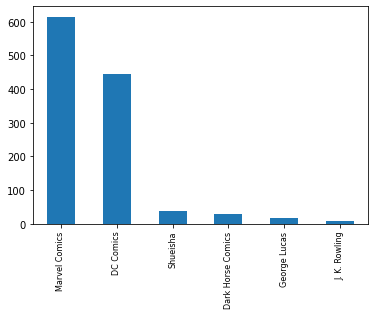

In [65]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


train2['creator'].value_counts().plot(kind='bar')
plt.xticks(fontsize=8)
plt.show()


In [66]:
#Using a 70/30 Split on training/test data. 
y2 = train2['creator'].values
X2 = train2['text'].values 

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3, random_state=True)

Part II Step III: Vectorizing training and testing data using the vectorizers created in part I. 

In [67]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
X2_train_vec = unigram_vectorizer.fit_transform(X2_train)

#check contents of the document vector
print(X2_train_vec.shape)
print(X2_train_vec[0].toarray())
#print out the first 10 items in the vocabulary
print(list(unigram_vectorizer.vocabulary_))
#check the size of the constructed vocabulary
print(len(unigram_vectorizer.vocabulary_))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
(805, 13457)
[[0 0 0 ... 0 0 0]]
['sir', 'james', 'braddock', 'wa', 'denizen', 'otherworld', 'otherdimensional', 'realm', 'merlyn', 'sent', 'earth', 'father', 'champion', 'known', 'captain', 'britain', 'arriving', 'england', 'dr', 'united', 'kingdom', 'leading', 'research', 'scientist', 'soon', 'married', 'set', 'home', 'manor', 'created', 'highly', 'advanced', 'named', 'mastermind', 'mr', 'child', 'jamie', 'jr', 'eldest', 'twin', 'brian', 'elizabeth', 'early', 'parent', 'killed', 'explosion', 'laboratory', 'caused', 'malfunctioning', 'computer', 'pursued', 'study', 'physic', 'university', 'worked', 'charter', 'pilot', 'hero', 'alerted', 'brother', 'injured', 'testing', 'racing', 'car', 'ground', 'apparently', 'attack', 'accident', 'flew', 'plane', 'downed', 'near

In [68]:
print("Unique counts for count vectorizer:" , len(unigram_vectorizer.vocabulary_))


Unique counts for count vectorizer: 13457


In [69]:
X2_test_vec = unigram_vectorizer.transform(X2_test)

print(X2_test_vec.shape)

(346, 13457)


Creating tfidf vectorizer for training and testing data.  

In [70]:
#Vectorizing using TFidf
X2tfidf_train_vec = unigram_tfidf_vectorizer.fit_transform(X2_train)
print(X2tfidf_train_vec.shape)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


(805, 13457)


In [71]:
X2tfidf_test_vec = unigram_tfidf_vectorizer.transform(X2_test)
print(X2tfidf_test_vec.shape)

(346, 13457)


PART II Step IV:  Create Decision Tree Models for both vectorizers

In [72]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth=3)

clf_tree = clf_tree.fit(X2_train_vec,y2_train)

prediction = clf_tree.predict(X2_test_vec)

In [73]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y2_test, prediction))

Accuracy:  0.638728323699422


[Text(0.5909090909090909, 0.875, 'X[1245] <= 0.5\ngini = 0.567\nsamples = 805\nvalue = [308, 23, 14, 6, 429, 25]'),
 Text(0.36363636363636365, 0.625, 'X[7905] <= 0.5\ngini = 0.548\nsamples = 721\nvalue = [225, 23, 14, 6, 428, 25]'),
 Text(0.18181818181818182, 0.375, 'X[1088] <= 0.5\ngini = 0.599\nsamples = 583\nvalue = [224, 23, 14, 6, 291, 25]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.617\nsamples = 519\nvalue = [223, 23, 14, 6, 228, 25]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.031\nsamples = 64\nvalue = [1, 0, 0, 0, 63, 0]'),
 Text(0.5454545454545454, 0.375, 'X[11714] <= 2.0\ngini = 0.014\nsamples = 138\nvalue = [1, 0, 0, 0, 137, 0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 137\nvalue = [0, 0, 0, 0, 137, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]'),
 Text(0.8181818181818182, 0.625, 'X[1498] <= 2.5\ngini = 0.024\nsamples = 84\nvalue = [83, 0, 0, 0, 1, 0]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsample

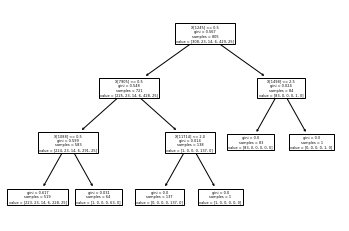

In [74]:
from matplotlib import pyplot as plt
from sklearn import tree
tree.plot_tree(clf_tree)

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y2_test, prediction))

                   precision    recall  f1-score   support

        DC Comics       1.00      0.26      0.41       136
Dark Horse Comics       0.00      0.00      0.00         6
     George Lucas       0.00      0.00      0.00         4
    J. K. Rowling       0.00      0.00      0.00         2
    Marvel Comics       0.60      1.00      0.75       186
         Shueisha       0.00      0.00      0.00        12

         accuracy                           0.64       346
        macro avg       0.27      0.21      0.19       346
     weighted avg       0.71      0.64      0.56       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Building Decision Tree Model with TF-idf vectorizer

In [76]:
clf_tree2 = DecisionTreeClassifier(max_depth=3)

clf_tree2 = clf_tree2.fit(X2tfidf_train_vec,y2_train)

prediction2 = clf_tree2.predict(X2tfidf_test_vec)

In [77]:
print("Accuracy: ", metrics.accuracy_score(y2_test, prediction2))

Accuracy:  0.6416184971098265


[Text(0.5909090909090909, 0.875, 'X[1245] <= 0.002\ngini = 0.567\nsamples = 805\nvalue = [308, 23, 14, 6, 429, 25]'),
 Text(0.36363636363636365, 0.625, 'X[7905] <= 0.002\ngini = 0.548\nsamples = 721\nvalue = [225, 23, 14, 6, 428, 25]'),
 Text(0.18181818181818182, 0.375, 'X[1088] <= 0.002\ngini = 0.599\nsamples = 583\nvalue = [224, 23, 14, 6, 291, 25]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.617\nsamples = 519\nvalue = [223, 23, 14, 6, 228, 25]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.031\nsamples = 64\nvalue = [1, 0, 0, 0, 63, 0]'),
 Text(0.5454545454545454, 0.375, 'X[3019] <= 0.02\ngini = 0.014\nsamples = 138\nvalue = [1, 0, 0, 0, 137, 0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 137\nvalue = [0, 0, 0, 0, 137, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]'),
 Text(0.8181818181818182, 0.625, 'X[903] <= 0.088\ngini = 0.024\nsamples = 84\nvalue = [83, 0, 0, 0, 1, 0]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\

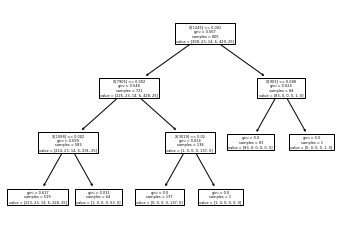

In [78]:
tree.plot_tree(clf_tree2)

In [79]:
print(classification_report(y2_test, prediction2))

                   precision    recall  f1-score   support

        DC Comics       1.00      0.26      0.42       136
Dark Horse Comics       0.00      0.00      0.00         6
     George Lucas       0.00      0.00      0.00         4
    J. K. Rowling       0.00      0.00      0.00         2
    Marvel Comics       0.60      1.00      0.75       186
         Shueisha       0.00      0.00      0.00        12

         accuracy                           0.64       346
        macro avg       0.27      0.21      0.19       346
     weighted avg       0.72      0.64      0.57       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Building Niave Bayes Classifiers

In [80]:
bayes_clf = MultinomialNB()

bayes_clf.fit(X2_train_vec, y2_train)

bayes_clf.score(X2_test_vec,y2_test)

0.9248554913294798

In [81]:
bayes_pred = bayes_clf.fit(X2_train_vec, y2_train).predict(X2_test_vec)

In [82]:
bayescm = confusion_matrix(y2_test, bayes_pred)
print(bayescm)

[[127   1   0   0   8   0]
 [  2   2   0   0   2   0]
 [  1   0   1   0   2   0]
 [  1   0   0   1   0   0]
 [  8   0   0   0 178   0]
 [  1   0   0   0   0  11]]


In [83]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y2_test, bayes_pred, average=None))
print(recall_score(y2_test, bayes_pred, average=None))

print(classification_report(y2_test, bayes_pred))

[0.90714286 0.66666667 1.         1.         0.93684211 1.        ]
[0.93382353 0.33333333 0.25       0.5        0.95698925 0.91666667]
                   precision    recall  f1-score   support

        DC Comics       0.91      0.93      0.92       136
Dark Horse Comics       0.67      0.33      0.44         6
     George Lucas       1.00      0.25      0.40         4
    J. K. Rowling       1.00      0.50      0.67         2
    Marvel Comics       0.94      0.96      0.95       186
         Shueisha       1.00      0.92      0.96        12

         accuracy                           0.92       346
        macro avg       0.92      0.65      0.72       346
     weighted avg       0.92      0.92      0.92       346



Naive Bayes with Tf-idf

In [84]:
tfidfbayes_clf = MultinomialNB()

tfidfbayes_clf.fit(X2tfidf_train_vec, y2_train)

tfidfbayes_clf.score(X2tfidf_test_vec,y2_test)

0.815028901734104

In [85]:
tfidfbayes_pred = tfidfbayes_clf.fit(X2tfidf_train_vec, y2_train).predict(X2tfidf_test_vec)

In [86]:
tfidfbayescm = confusion_matrix(y2_test, tfidfbayes_pred)
print(tfidfbayescm)

[[ 96   0   0   0  40   0]
 [  1   0   0   0   5   0]
 [  0   0   0   0   4   0]
 [  0   0   0   0   2   0]
 [  0   0   0   0 186   0]
 [  1   0   0   0  11   0]]


In [87]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y2_test, tfidfbayes_pred, average=None))
print(recall_score(y2_test, tfidfbayes_pred, average=None))

print(classification_report(y2_test, tfidfbayes_pred))

[0.97959184 0.         0.         0.         0.75       0.        ]
[0.70588235 0.         0.         0.         1.         0.        ]
                   precision    recall  f1-score   support

        DC Comics       0.98      0.71      0.82       136
Dark Horse Comics       0.00      0.00      0.00         6
     George Lucas       0.00      0.00      0.00         4
    J. K. Rowling       0.00      0.00      0.00         2
    Marvel Comics       0.75      1.00      0.86       186
         Shueisha       0.00      0.00      0.00        12

         accuracy                           0.82       346
        macro avg       0.29      0.28      0.28       346
     weighted avg       0.79      0.82      0.78       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

SVM Count Vectorizer Model 

In [88]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()

svm_clf.fit(X2_train_vec, y2_train)

LinearSVC()

In [89]:
svm_clf.score(X2_test_vec, y2_test)

0.8236994219653179

In [90]:
svm_predict = svm_clf.predict(X2_test_vec)
svm_cm = confusion_matrix(y2_test, svm_predict, labels = ['DC Comics', 'Dark Horse Comics', 'George Lucas', 'J. K. Rowling', 'Marvel Comics', 'Shueisha'])
print(svm_cm)
print()

[[108   1   0   0  26   1]
 [  3   1   0   0   2   0]
 [  0   0   4   0   0   0]
 [  1   0   0   1   0   0]
 [ 22   0   0   0 163   1]
 [  3   0   0   0   1   8]]



In [91]:
target_names = ['DC Comics', 'Dark Horse Comics', 'George Lucas', 'J. K. Rowling', 'Marvel Comics', 'Shueisha']
print(classification_report(y2_test, svm_predict, target_names = target_names))

                   precision    recall  f1-score   support

        DC Comics       0.79      0.79      0.79       136
Dark Horse Comics       0.50      0.17      0.25         6
     George Lucas       1.00      1.00      1.00         4
    J. K. Rowling       1.00      0.50      0.67         2
    Marvel Comics       0.85      0.88      0.86       186
         Shueisha       0.80      0.67      0.73        12

         accuracy                           0.82       346
        macro avg       0.82      0.67      0.72       346
     weighted avg       0.82      0.82      0.82       346



SVM TF-idf Model

In [92]:
tfidfsvm_clf = LinearSVC()

tfidfsvm_clf.fit(X2tfidf_train_vec, y2_train)

LinearSVC()

In [93]:
tfidfsvm_clf.score(X2tfidf_test_vec, y2_test)

0.9161849710982659

In [94]:
tfidfsvm_predict = tfidfsvm_clf.predict(X2tfidf_test_vec)
tfidfsvm_cm = confusion_matrix(y2_test, tfidfsvm_predict, labels = ['DC Comics', 'Dark Horse Comics', 'George Lucas', 'J. K. Rowling', 'Marvel Comics', 'Shueisha'])
print(tfidfsvm_cm)
print()

[[125   0   0   0  11   0]
 [  2   2   0   0   2   0]
 [  0   0   2   0   2   0]
 [  1   0   0   1   0   0]
 [  9   0   0   0 177   0]
 [  2   0   0   0   0  10]]



In [95]:
target_names = ['DC Comics', 'Dark Horse Comics', 'George Lucas', 'J. K. Rowling', 'Marvel Comics', 'Shueisha']
print(classification_report(y2_test, tfidfsvm_predict, target_names = target_names))

                   precision    recall  f1-score   support

        DC Comics       0.90      0.92      0.91       136
Dark Horse Comics       1.00      0.33      0.50         6
     George Lucas       1.00      0.50      0.67         4
    J. K. Rowling       1.00      0.50      0.67         2
    Marvel Comics       0.92      0.95      0.94       186
         Shueisha       1.00      0.83      0.91        12

         accuracy                           0.92       346
        macro avg       0.97      0.67      0.76       346
     weighted avg       0.92      0.92      0.91       346



Vectorizing Uknown creator text. 

In [96]:
unknowns = unknown['creator'].values
X3 = unknown['text'].values

In [97]:
X3tfidf_test_vec = unigram_tfidf_vectorizer.transform(X3)

In [98]:
X3_test_vec = unigram_vectorizer.transform(X3)

Predicting Unknowns

In [99]:
whoarethey = tfidfsvm_clf.predict(X3tfidf_test_vec)

In [100]:
Creators = pd.DataFrame(whoarethey, columns=['predictions']).to_csv('whoarthey.csv')

In [101]:
whoarethey = pd.DataFrame(whoarethey, columns = ['prediction made'])


In [102]:
whoarethey.head()

,prediction made
0,Marvel Comics
1,Marvel Comics
2,DC Comics
3,Marvel Comics
4,Marvel Comics


In [103]:
whoarethey.value_counts()

prediction made
Marvel Comics      94
DC Comics          45
dtype: int64

Visualize Naive Bayes Confusion Matrix

In [104]:
whoarethey2 = bayes_clf.predict(X3_test_vec)
Creators2 = pd.DataFrame(whoarethey2, columns=['predictions']).to_csv('whoarthey2.csv')
predict_unknowns = pd.DataFrame(whoarethey2, columns=['who are they'])

In [105]:
predict_unknowns.value_counts()

who are they     
DC Comics            72
Marvel Comics        63
Shueisha              3
Dark Horse Comics     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


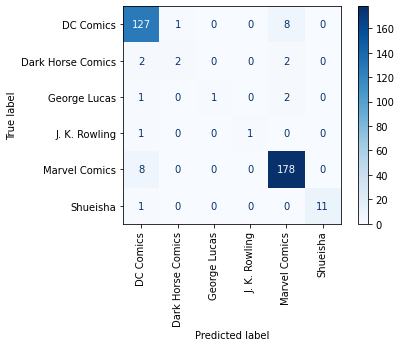

<Figure size 720x720 with 0 Axes>

In [106]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bayes_clf,X2_test_vec, y2_test, xticks_rotation=90, cmap="Blues")
plt.figure(figsize=(10,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


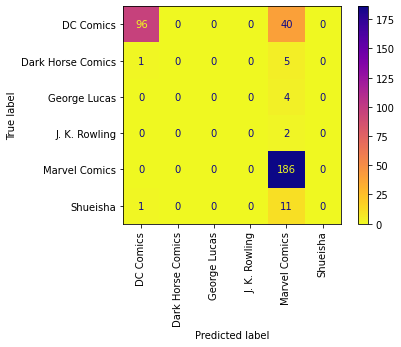

<Figure size 576x288 with 0 Axes>

In [107]:
plot_confusion_matrix(tfidfbayes_clf, X2tfidf_test_vec, y2_test, xticks_rotation=90, cmap="plasma_r")
plt.figure(figsize=(8,4))
plt.show()


Visualize Confusion Matrix for SVM CountVectorizer and TFIDF Vectorizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


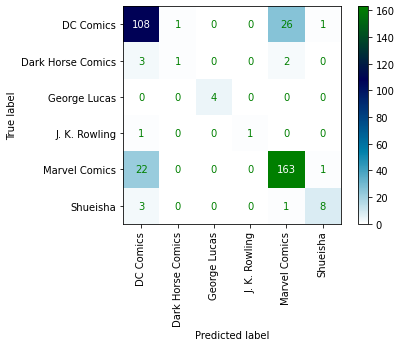

<Figure size 576x288 with 0 Axes>

In [108]:
plot_confusion_matrix(svm_clf, X2_test_vec, y2_test, xticks_rotation=90, cmap="ocean_r")
plt.figure(figsize=(8,4))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


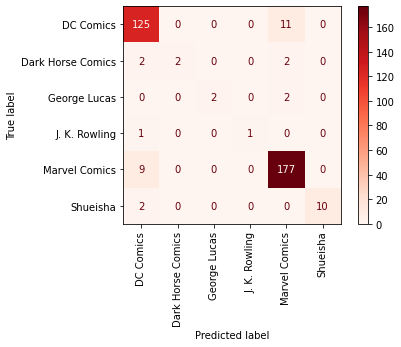

<Figure size 576x288 with 0 Axes>

In [109]:
plot_confusion_matrix(tfidfsvm_clf, X2tfidf_test_vec, y2_test, xticks_rotation=90, cmap="Reds")
plt.figure(figsize=(8,4))
plt.show()